In [1]:
import mlflow
from mlflow.entities import ViewType
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import ast
import pandas as pd

In [2]:
mlflow.get_registry_uri()

'http://127.0.0.1:5000'

In [3]:
def getLabelDistribution(experiment):
    runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
    )

    run = runs.iloc[0]
    
    labelDistributionOriginal_string = run["params.labelDistribution_0_Original"]
    labelDistributionSMOTE_string = run["params.labelDistribution_0_SMOTE"]

    dictStringOriginal = labelDistributionOriginal_string.split("(", 1)[1].rsplit(")", 1)[0]
    dictStringSMOTE = labelDistributionSMOTE_string.split("(", 1)[1].rsplit(")", 1)[0]

    labelDistributionOriginal_dict = ast.literal_eval(dictStringOriginal)
    labelDistributionSMOTE_dict = ast.literal_eval(dictStringSMOTE)

    keysOriginal = list(labelDistributionOriginal_dict.keys())
    valuesOriginal = list(labelDistributionOriginal_dict.values())
    keysSMOTE = list(labelDistributionSMOTE_dict.keys())
    valuesSMOTE = list(labelDistributionSMOTE_dict.values())
    
    return keysOriginal, valuesOriginal, keysSMOTE, valuesSMOTE

In [4]:
def getRunMetricsAndArtifacts(experimentName: str, runName: str):
    
    experiment = mlflow.get_experiment_by_name(experimentName)
    experiment_id = experiment.experiment_id
    
    run = mlflow.search_runs(experiment_ids=[experiment_id], filter_string=f"tags.mlflow.runName = '{runName}'")
    runID = run.iloc[0]['run_id']
    run_info = mlflow.get_run(runID)
    
    path = mlflow.artifacts.download_artifacts(
        run_id=runID, artifact_path="confusion_matrix.png"
    )

    metrics = run_info.data.metrics

    mean_precision = metrics.get('mean_precision')
    mean_recall = metrics.get('mean_recall')
    mean_f1 = metrics.get('mean_f1')
    
    return path, mean_precision, mean_recall, mean_f1

In [5]:
originalPathLevels, original_mean_precision_levels, original_mean_recall_levels, original_mean_f1_levels = getRunMetricsAndArtifacts("ORIGINAL_LEVELS", "original_levels")
originalPathCategories, original_mean_precision_categories, original_mean_recall_categories, original_mean_f1_categories = getRunMetricsAndArtifacts("ORIGINAL_CATEGORIES", "original_categories")

## TORE Label Distribution with vs. without SMOTE (sampling strategy: not majority)

### Balancing all classes but the majority class

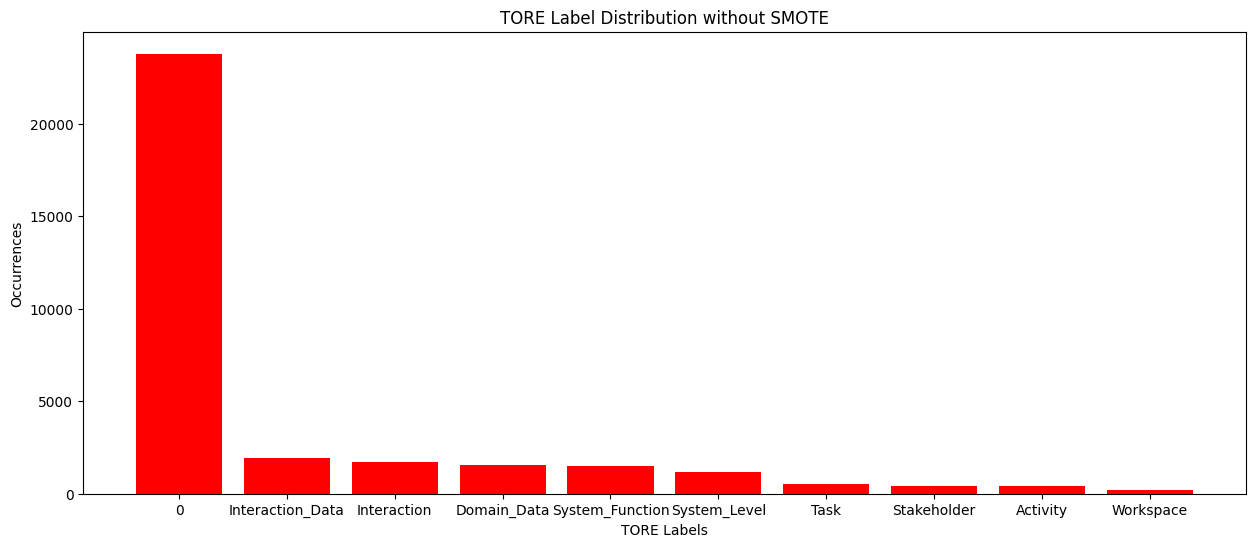

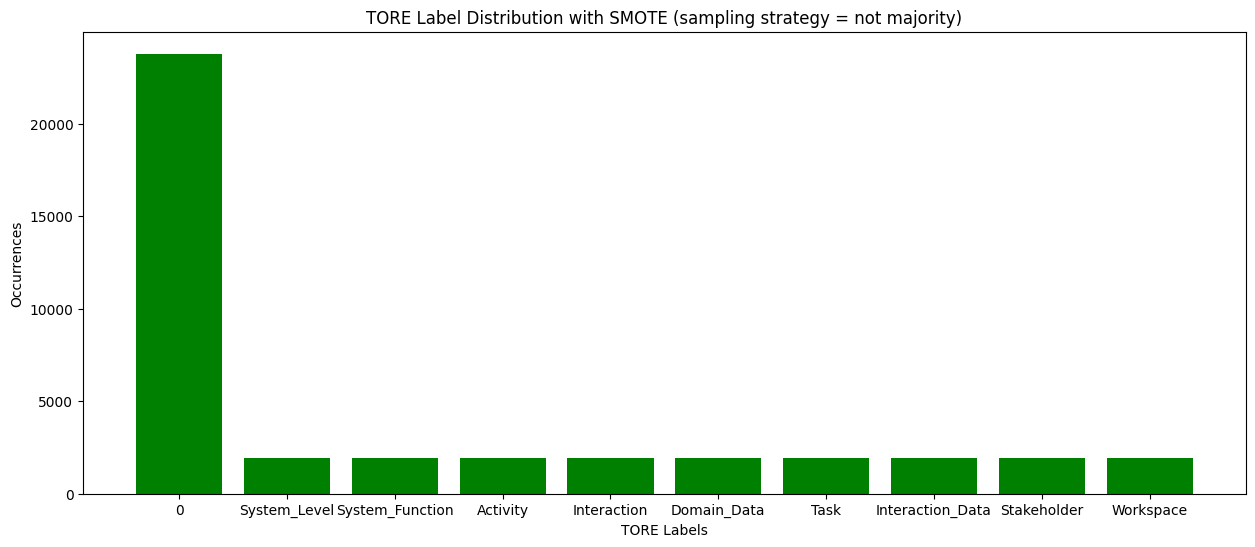

In [6]:
experimentSMOTE = mlflow.get_experiment_by_name("SMOTE_MAJORITY_CATEGORIES")

keysOriginal, valuesOriginal, keysSMOTE, valuesSMOTE = getLabelDistribution(experimentSMOTE)

plt.figure(figsize=(15, 6))
plt.bar(keysOriginal, valuesOriginal, color= 'red')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution without SMOTE')
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(keysSMOTE, valuesSMOTE, color= 'green')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution with SMOTE (sampling strategy = not majority)')
plt.show()

## Performance Comparison BERT with vs. without SMOTE  (sampling strategy: not majority)

## BERT First Stage (TORE Levels)

<function matplotlib.pyplot.show(close=None, block=None)>

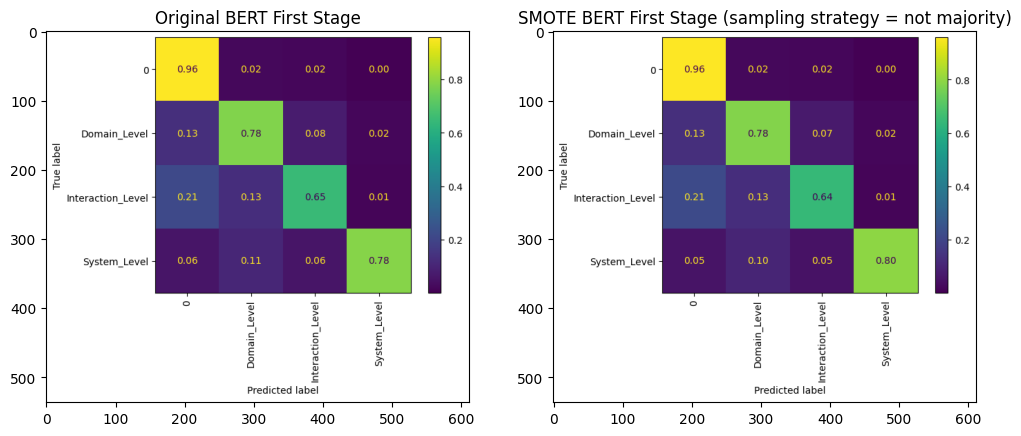

In [7]:
smotePath, smote_mean_precision, smote_mean_recall, smote_mean_f1 = getRunMetricsAndArtifacts("SMOTE_MAJORITY_LEVELS", "smote_majority_levels")

smote_image = Image.open(smotePath)
original_image = Image.open(originalPathLevels)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT First Stage")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE BERT First Stage (sampling strategy = not majority)")

plt.show

In [8]:
data = {
    'Run': ['SMOTE_MAJORITY_LEVELS', 'ORIGINAL_LEVELS'],
    'Mean Precision': [smote_mean_precision, original_mean_precision_levels],
    'Mean Recall': [smote_mean_recall, original_mean_recall_levels],
    'Mean F1': [smote_mean_f1, original_mean_f1_levels]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MAJORITY_LEVELS,0.822685,0.795639,0.808915
1,ORIGINAL_LEVELS,0.818994,0.792133,0.805312


## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

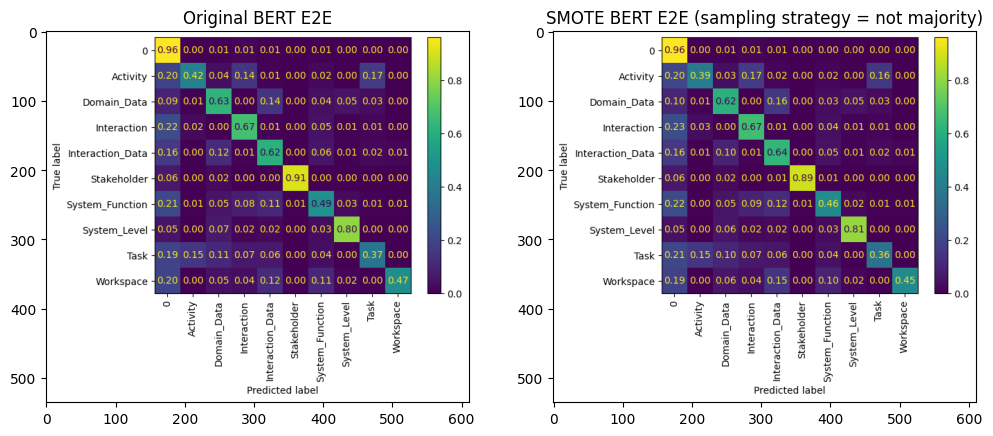

In [9]:
smotePath, smote_mean_precision, smote_mean_recall, smote_mean_f1 = getRunMetricsAndArtifacts("SMOTE_MAJORITY_CATEGORIES", "smote_majority_categories")

smote_image = Image.open(smotePath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE BERT E2E (sampling strategy = not majority)")

plt.show

In [10]:
data = {
    'Run': ['SMOTE_MAJORITY_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MAJORITY_CATEGORIES,0.665738,0.627026,0.645766
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106


## TORE Label Distribution with vs. without SMOTE (sampling strategy: minority)

### Balancing only the minority class

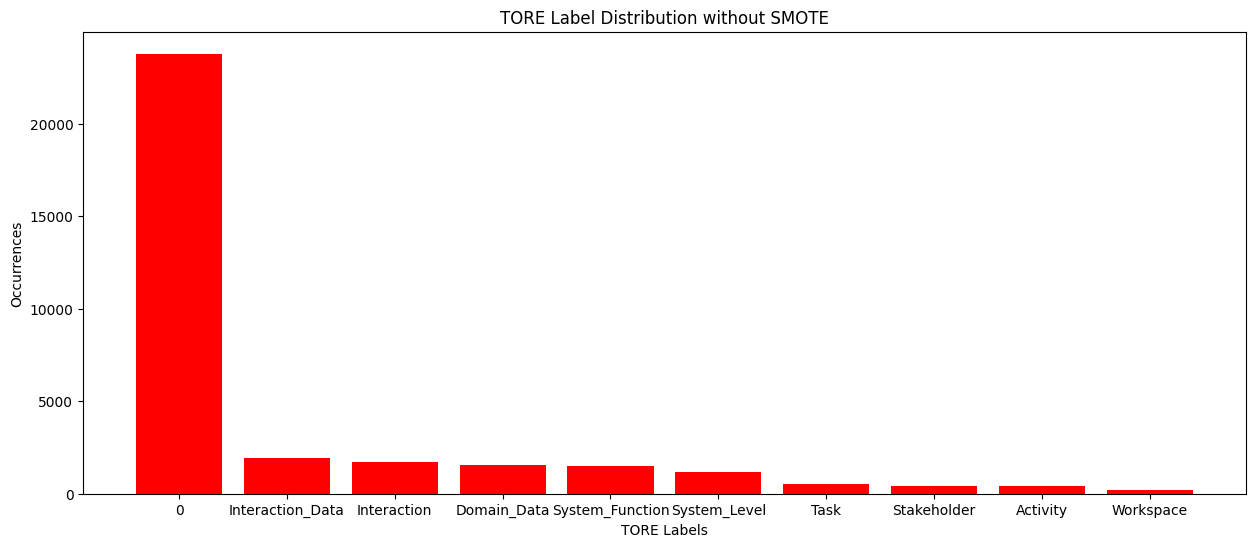

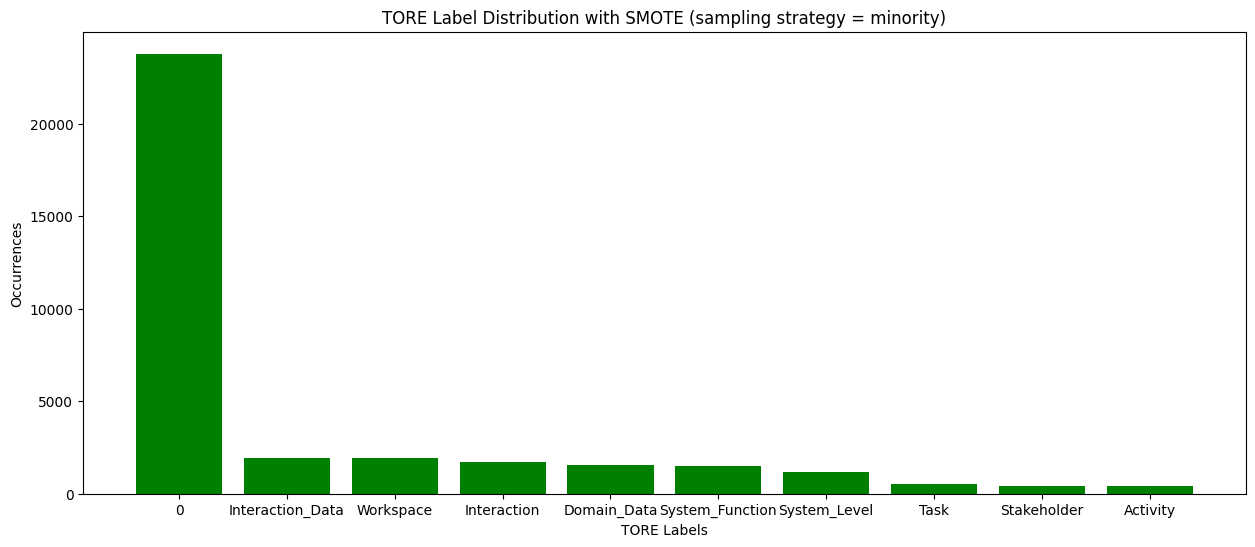

In [11]:
experimentSMOTE = mlflow.get_experiment_by_name("SMOTE_MINORITY_CATEGORIES")

keysOriginal, valuesOriginal, keysSMOTE, valuesSMOTE = getLabelDistribution(experimentSMOTE)

plt.figure(figsize=(15, 6))
plt.bar(keysOriginal, valuesOriginal, color= 'red')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution without SMOTE')
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(keysSMOTE, valuesSMOTE, color= 'green')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution with SMOTE (sampling strategy = minority)')
plt.show()

## Performance Comparison BERT with vs. without SMOTE  (sampling strategy: minority)

## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

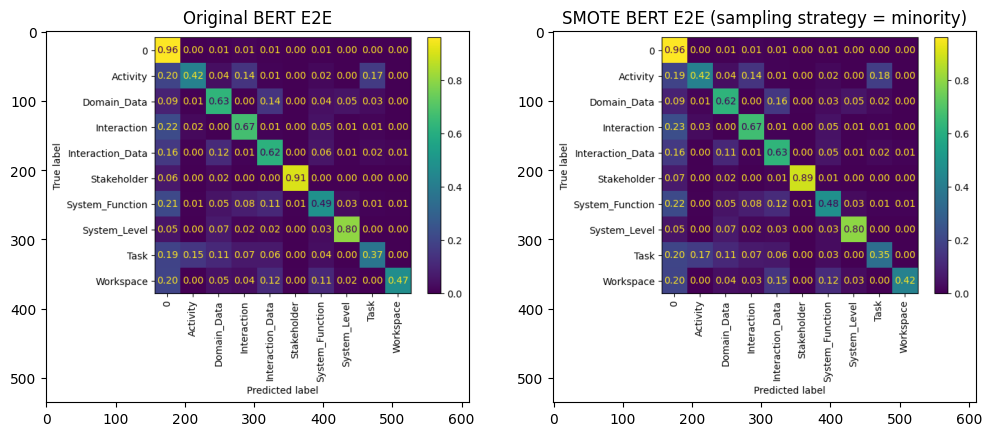

In [19]:
smotePath, smote_mean_precision, smote_mean_recall, smote_mean_f1 = getRunMetricsAndArtifacts("SMOTE_MINORITY_CATEGORIES", "smote_minority_categories")

smote_image = Image.open(smotePath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE BERT E2E (sampling strategy = minority)")

plt.show

In [17]:
data = {
    'Run': ['SMOTE_MINORITY_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_MINORITY_CATEGORIES,0.676014,0.624572,0.649183
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106


## TORE Label Distribution with vs. without SMOTE (sampling strategy: to average)

### Balancing only the classes, which occurrences are lower than the average occurrence over all classes. The number of occurrences from these minority classes is increased to the average number of occurrences over all classes.

['0', 'Interaction_Data', 'Interaction', 'Domain_Data', 'System_Function', 'System_Level', 'Activity', 'Task', 'Stakeholder', 'Workspace']
[23782, 1927, 1723, 1550, 1492, 1156, 1045, 1045, 1045, 1045]


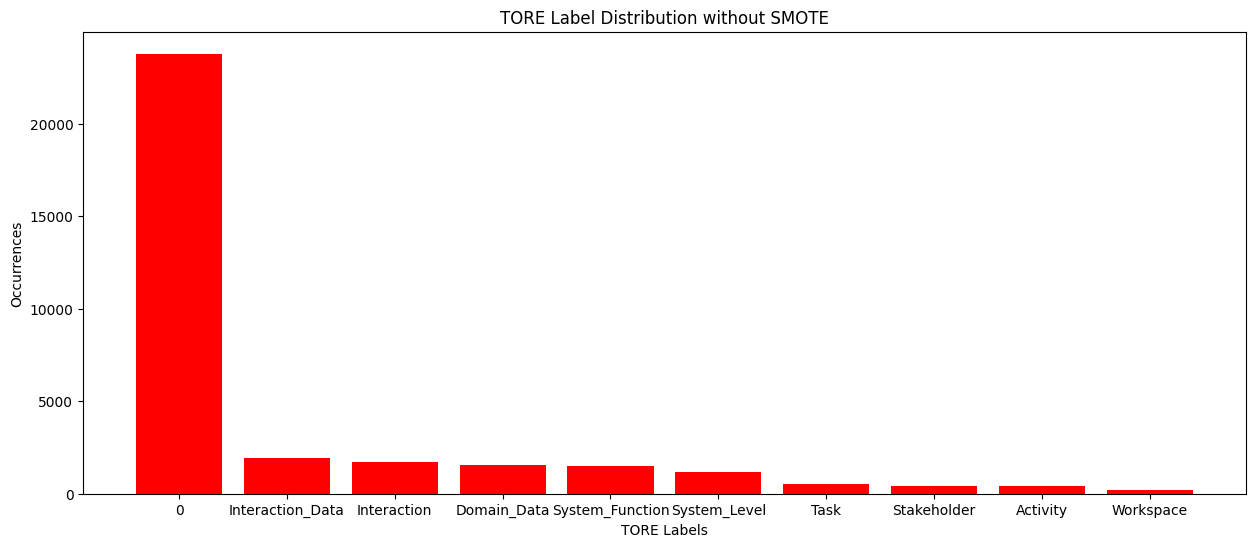

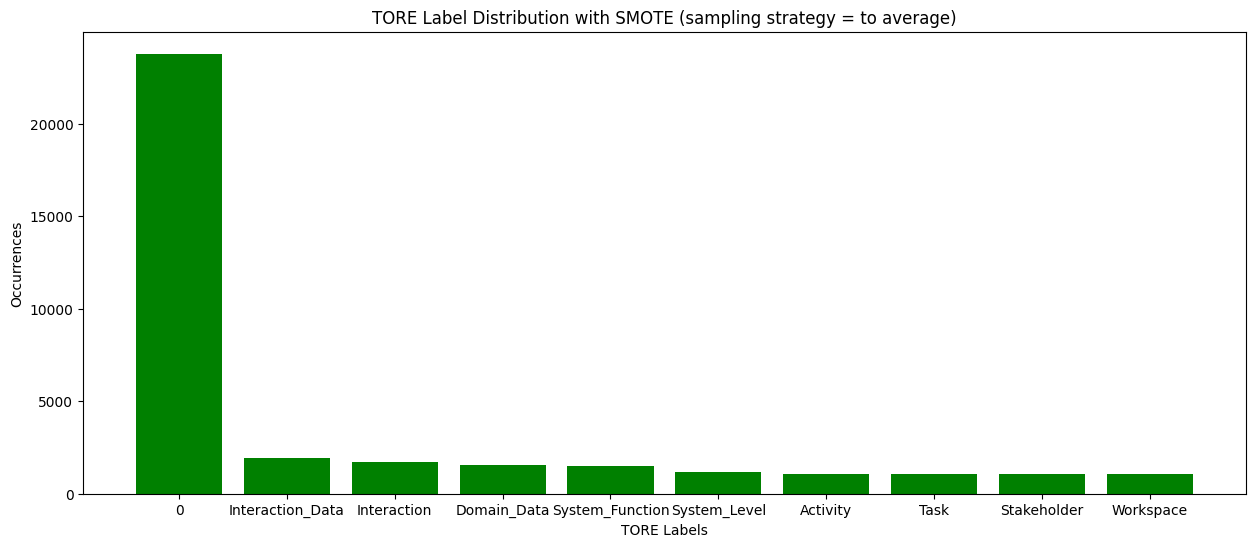

In [14]:
experimentSMOTE = mlflow.get_experiment_by_name("SMOTE_AVERAGE_CATEGORIES")

keysOriginal, valuesOriginal, keysSMOTE, valuesSMOTE = getLabelDistribution(experimentSMOTE)

print(keysSMOTE)
print(valuesSMOTE)

plt.figure(figsize=(15, 6))
plt.bar(keysOriginal, valuesOriginal, color= 'red')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution without SMOTE')
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(keysSMOTE, valuesSMOTE, color= 'green')
plt.xlabel('TORE Labels')
plt.ylabel('Occurrences')
plt.title('TORE Label Distribution with SMOTE (sampling strategy = to average)')
plt.show()

## Performance Comparison BERT with vs. without SMOTE  (sampling strategy: to average)

## BERT E2E (TORE Categories)

<function matplotlib.pyplot.show(close=None, block=None)>

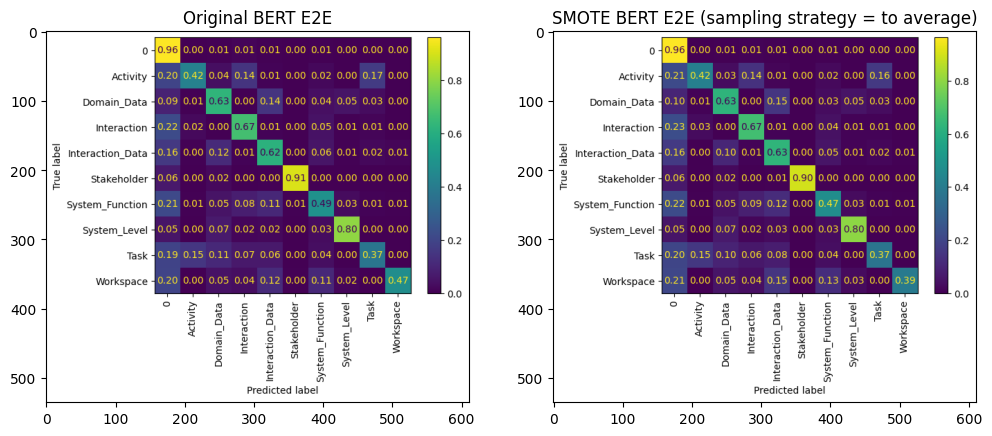

In [18]:
smotePath, smote_mean_precision, smote_mean_recall, smote_mean_f1 = getRunMetricsAndArtifacts("SMOTE_AVERAGE_CATEGORIES", "smote_average_categories")

smote_image = Image.open(smotePath)
original_image = Image.open(originalPathCategories)

plt.figure(figsize=(12, 6))

# Plot original
plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original BERT E2E")

# Plot SMOTE
plt.subplot(1,2,2)
plt.imshow(smote_image)
plt.title("SMOTE BERT E2E (sampling strategy = to average)")

plt.show

In [16]:
data = {
    'Run': ['SMOTE_AVERAGE_CATEGORIES', 'ORIGINAL_CATEGORIES'],
    'Mean Precision': [smote_mean_precision, original_mean_precision_categories],
    'Mean Recall': [smote_mean_recall, original_mean_recall_categories],
    'Mean F1': [smote_mean_f1, original_mean_f1_categories]
}

df = pd.DataFrame(data)
df

,Run,Mean Precision,Mean Recall,Mean F1
0,SMOTE_AVERAGE_CATEGORIES,0.676014,0.624572,0.649183
1,ORIGINAL_CATEGORIES,0.670642,0.634695,0.652106
